In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot model train time

In [2]:
df = pd.read_csv("../reports/results-time.csv")

In [3]:
df.columns

Index(['Datset name', 'DAE time', 'CNN time', 'FT time', 'DAE/FT', 'CNN/FT',
       'Size'],
      dtype='object')

In [4]:
# drop rows with averaged results, rename columns and melt variables
time_df= df.drop([15, 19, 25,26])[['Datset name', 'Size', 'DAE time', 'CNN time', 'FT time']].rename(columns={'DAE time':'DAE-FF', 'CNN time':'Multi-Channel CNN', 'FT time':'fastText classifier'}).melt(id_vars=['Datset name', 'Size'], value_vars=['DAE-FF', 'Multi-Channel CNN', 'fastText classifier']).dropna()

In [5]:
time_df = time_df.rename(columns={'value':'Training time [s]', 'Size':'Dataset size', 'variable':'Model name'})

In [6]:
time_df.head()

,Datset name,Dataset size,Model name,Training time [s]
0,ACEInhibitors,2544.0,DAE-FF,400
1,ADHD,851.0,DAE-FF,102
2,Antihistamines,310.0,DAE-FF,37
3,Atypical Antipsychotics,1120.0,DAE-FF,145
4,Beta Blockers,2072.0,DAE-FF,313


In [7]:
time_df['Training time [s]'] = time_df['Training time [s]'].astype(float)

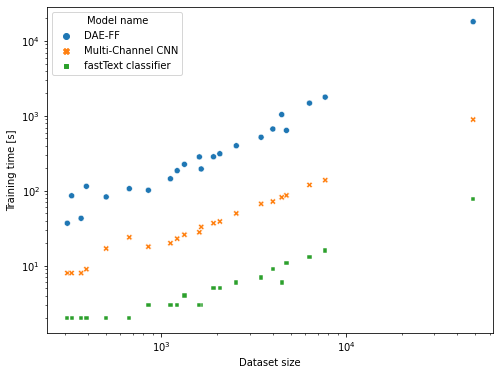

In [8]:
f, ax = plt.subplots(figsize=(8, 6))
ax.set(xscale="log", yscale="log")
# sns.set_style("ticks")

g= sns.scatterplot(x="Dataset size", y="Training time [s]", hue="Model name", style="Model name", data=time_df, ax=ax)

# plt.savefig('train_time.jpg', format='jpeg', dpi=150)

# Plot model performance based on used inout features

In [9]:
df1 = pd.read_csv("../reports/results-document_features.csv")
df1.head()

,Model,Features,ACEInhibitors,ADHD,Antihistamines,Atypical Antipsychotics,Beta Blockers,Calcium Channel Blockers,Estrogens,NSAIDs,...,Skeletal Muscle Relaxants,Statins,Triptans,Urinary Incontinence,COPD,Proton Beam,Micro Nutrients,PFOA/PFOS,Bisphenol A (BPA),Fluoride and neurotoxicity
0,DAE-FF,All features,0.785,0.639,0.275,0.190,0.462,0.347,0.369,0.735,...,0.286,0.487,0.412,0.483,0.665,0.812,0.663,0.713,0.780,0.806
1,DAE-FF,Title and Abstract,0.709,0.500,0.168,0.221,0.451,0.337,0.358,0.679,...,0.327,0.434,0.253,0.531,0.665,0.810,0.648,0.839,0.754,0.838
2,DAE-FF,Abstract only,0.658,0.404,0.265,0.230,0.390,0.297,0.331,0.690,...,0.430,0.392,0.320,0.482,0.676,0.790,0.665,0.847,0.715,0.758
3,DAE-FF,Title only,0.806,0.651,0.016,0.046,0.408,0.137,0.145,0.658,...,0.125,0.255,0.199,0.372,0.677,0.799,0.677,0.696,0.631,0.726
4,Multi-Channel CNN,All features,0.367,0.704,0.135,0.081,0.399,0.069,0.083,0.601,...,0.300,0.283,0.440,0.180,0.128,0.357,0.199,0.305,0.369,0.808


In [10]:
df1.groupby("Model").max()

,Features,ACEInhibitors,ADHD,Antihistamines,Atypical Antipsychotics,Beta Blockers,Calcium Channel Blockers,Estrogens,NSAIDs,Opioids,...,Skeletal Muscle Relaxants,Statins,Triptans,Urinary Incontinence,COPD,Proton Beam,Micro Nutrients,PFOA/PFOS,Bisphenol A (BPA),Fluoride and neurotoxicity
Model,,,,,,,,,,,,,,,,,,,,,
DAE-FF,Title only,0.806,0.651,0.275,0.230,0.462,0.347,0.369,0.735,0.580,...,0.430,0.487,0.412,0.531,0.677,0.812,0.677,0.847,0.780,0.838
Multi-Channel CNN,Title only,0.648,0.704,0.204,0.086,0.399,0.117,0.092,0.601,0.420,...,0.329,0.283,0.440,0.180,0.372,0.559,0.268,0.405,0.612,0.808
fastText classifier,Title only,0.783,0.470,0.192,0.218,0.419,0.244,0.306,0.620,0.559,...,0.210,0.409,0.211,0.439,0.553,0.771,0.608,0.796,0.637,0.390


In [11]:
features_df = df1.melt(id_vars=['Model', 'Features'], value_vars=df1.columns[2:])

In [12]:
features_df.head()

,Model,Features,variable,value
0,DAE-FF,All features,ACEInhibitors,0.785
1,DAE-FF,Title and Abstract,ACEInhibitors,0.709
2,DAE-FF,Abstract only,ACEInhibitors,0.658
3,DAE-FF,Title only,ACEInhibitors,0.806
4,Multi-Channel CNN,All features,ACEInhibitors,0.367


In [13]:
idmax_list = features_df.groupby(["variable", "Model"]).apply(lambda df1:df1['value'].idxmax()).tolist()

In [14]:
max_df = features_df.iloc[idmax_list]

In [15]:
max_df.head()

,Model,Features,variable,value
3,DAE-FF,Title only,ACEInhibitors,0.806
6,Multi-Channel CNN,Abstract only,ACEInhibitors,0.648
8,fastText classifier,All features,ACEInhibitors,0.783
15,DAE-FF,Title only,ADHD,0.651
16,Multi-Channel CNN,All features,ADHD,0.704


In [16]:
feat_model_df = max_df.groupby(["Features", "Model"]).count()['value']

In [17]:
feat_model_df.reset_index().head()

,Features,Model,value
0,Abstract only,DAE-FF,3
1,Abstract only,Multi-Channel CNN,2
2,Abstract only,fastText classifier,2
3,All features,DAE-FF,11
4,All features,Multi-Channel CNN,8


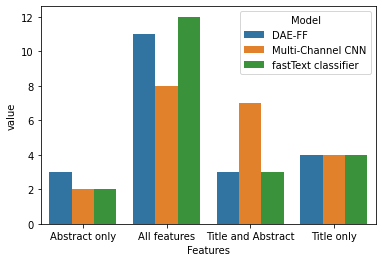

In [18]:
s2 = sns.barplot(x = 'Features', y = 'value', hue="Model", data = feat_model_df.reset_index())

In [19]:
feat_model_df.groupby("Features").sum()/feat_model_df.sum()

Features
Abstract only         0.111111
All features          0.492063
Title and Abstract    0.206349
Title only            0.190476
Name: value, dtype: float64

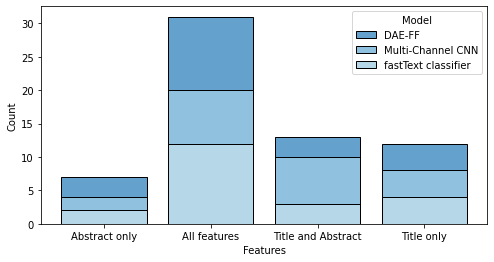

In [20]:
f, ax = plt.subplots(figsize=(8, 4))


ax = sns.histplot(feat_model_df.reset_index(), x='Features', hue='Model', weights='value',
             multiple='stack', palette='tab20c', shrink=0.8)
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))


# plt.savefig('features.jpg', format='jpeg', dpi=150)

# Plot box plots of model performance

In [21]:
scores_dict = {}

In [22]:
ft_adhd = [0.30446009389671363, 0.6213615023474178, 0.4053990610328639, 0.5626760563380281, 0.6025821596244131, 0.597887323943662, 0.47112676056338026, 0.3561032863849765, 0.45234741784037563, 0.3279342723004695]
dae_adhd = [0.7927230046948356, 0.24577464788732395, 0.6401408450704225, 0.31854460093896714, 0.30446009389671363, 0.7692488262910797, 0.3232394366197183, 0.2575117370892019, 0.6706572769953051, 0.5204225352112676]
cnn_adhd = [0.795774638652802,0.381176471710205,0.211267605423927,0.809411764144897, 0.823943674564362, 0.272941172122955, 0.319248825311661, 0.809411764144897, 0.237089201807976, 0.832941174507141, 0.241784036159515, 0.818823516368866, 0.424882620573044, 0.882352948188782, 0.638497650623322, 0.835294127464294, 0.16666667163372, 0.851764678955078, 0.227699533104896, 0.84235292673111, ]

In [23]:
scores_dict['ADHD'] = pd.DataFrame([ft_adhd, dae_adhd, cnn_adhd]).T

In [24]:
ft_pb = [0.7698653198653198, 0.7774410774410774, 0.7909090909090909, 0.7353535353535353, 0.7669191919191919, 0.7526094276094276, 0.7593434343434343, 0.7484006734006734, 0.7336700336700336, 0.771969696969697]
dae_pb = [0.8052188552188552, 0.806060606060606, 0.8266835016835017, 0.8178451178451178, 0.8026936026936027, 0.8132154882154882, 0.8031144781144781, 0.8031144781144781, 0.7976430976430976, 0.8241582491582491]
cnn_pb = [0.428451180458069, 0.599578976631165, 0.287878781557083, 0.575157880783081, 0.367003381252289, 0.53473687171936, 0.556818187236786, 0.475789487361908, 0.534932672977448, 0.280000001192093, 0.406144767999649, 0.533052623271942, 0.42676767706871, 0.508631587028503, 0.375841736793518, 0.445894747972488, 0.720959603786469, 0.535157918930054, 0.470117837190628, 0.721684217453003]

In [25]:
scores_dict['Proton Beam'] = pd.DataFrame([ft_pb, dae_pb, cnn_pb]).T

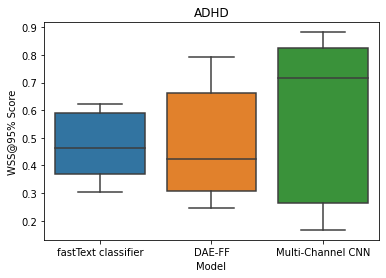

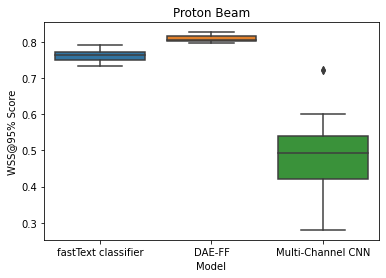

In [26]:
for dataset_name, score_df in scores_dict.items():
    score_df.columns = ["fastText classifier", "DAE-FF", "Multi-Channel CNN"]
    score_df = score_df.stack().reset_index()
    score_df.columns = ['a', 'Model', "WSS@95% Score"]

    f, ax = plt.subplots(figsize=(6, 4))
    sns.boxplot(x="Model", y="WSS@95% Score", data=score_df)
    ax.set_title(dataset_name)

#     plt.savefig(f'boxplot-{dataset_name}.jpg', format='jpeg', dpi=150)